<a href="https://colab.research.google.com/github/manoelpajr/projeto_data_science/blob/master/Project_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise exploratória inicial dos dados resumidos do *Airbnb* para Buenos Aires**

<img alt="Cidade de Buenos Aires" width="50%" src='https://image.freepik.com/free-vector/outline-landmarks-skyline_23-2148428501.jpg'>
<figcaption>Figura 1: Buenos Aires Skyline.</figcaption>

A cidade de Buenos Aires, capital política e econômica da Argentina, teve sua origem no Século XVI. Localizada na foz da Bacia do Rio da Plata, a cidade foi construída e colonizada, inicialmente e principalmente, por colonos vindos da Espanha. Até hoje, as marcas dessa colonização podem ser vistas em muitos momunentos históricos e em sua arquitetura.

<img alt="Arquitetura de Buenos Aires" width="50%" src='https://turismo.buenosaires.gob.ar/sites/turismo/files/field/image/casa_rosada_1200_fachada_sol_0.jpg'>
<figcaption>Figura 2: Casa Rosada. Sede do Governo Executivo Federal da Argentina.</figcaption> 

<img alt="Arquitetura de Buenos Aires" width="50%" src='https://www.cariocaemfuga.com/wordpress/wp-content/uploads/2011/10/IMG_2458.jpg'>
<figcaption>Figura 3: Arquitetura histórica de Buenos Aires.</figcaption>

Localizada em uma região de clima Temperado (as quatros estações do ano são bem definidas), e marcada pelo efeito da maritimidade, a cidade pode ser visitada em qualquer época do ano. Para aqueles que preferem o frio é melhor marcar a data da viagem entre abril/maio até julho/agosto; por outro lado, aqueles que preferem o calor, no final e no início do ano.

Atualmente, a cidade conta com aproximadamente 3 milhões de habitantes e a sua Região Metropolitana agrega 12 milhões de habitantes; logo, deduzimos que, a cidade tem um poder de atração muito elevado sendo a mais importante da Rede Urbana da Argentina. Nela encontra-se a [Bolsa de Balores da Argentina](https://www.byma.com.ar/en/homepage/), sedes e escritórios de importantes empresas nacionais e transnacionais, além de uma gama completa de serviços e comércio, e um parque industrial importante.

<img alt="Arquitetura moderna" width="50%" src='https://cdn.civitatis.com/argentina/buenos-aires/galeria/puente-mujer.jpg'>
<figcaption>Figura 4: Porto Madera - Buenos Aires.</figcaption>

Além de ser um centro econômico e político, a cidade também se destaca nos campos culturais e gastronômico. Os bares, os restaurantes, os teatros, dentre outros, são muito procurados pelas pessoas que a visitam.

Sendo uma cidade bastante procurada por turistas de diversas modalidades )negócios, político, cultural, gastronômico, dentre outros), a presença do [Airbnb](https://www.airbnb.com.br/) ajuda hóspedes a encontrarem diversas opções de hospedagem. Essas hospedagens podem ser casas ou apartamentos inteiros, quartos privados em casas e apartamentos particulares, mas também em hotéis, e mesmo quartos compartilhados.

Nesse contexto, o objetivo desse projeto é realizar uma análise exploratória inicial de dados resumidos encontrados no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) para a cidade de Buenos Aires.







## Obtenção dos dados

Todos os dados utilizados no projeto foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

*   listings.cvs - Informações e métricas resumidas para acomodações na cidade de Buenos Aires.

In [4]:
# importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-05-25/visualisations/listings.csv")

## **Análise Inicial dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados

**Dicionário de variáveis**

*   `id` - número de id gerado para identificar o imóvel
*   `name` - nome da propriedade anunciada
*   `host_id` - número de id do proprietário (anfitrião) da propriedade
*   `host_name` - Nome do anfitrião
*   `neighbourhood_group` - está coluna não contém nenhum valor válido
*   `neighbourhood` - nome do bairro
*   `latitude` - coordenada da latitude da propriedade
*   `longitude` - coordeanda da longitude da propriedade
*   `room_type` - informa o tipo de acomodação que é oferecido
*   `price` - preço para alugar o imóvel
*   `minimim_nights` - quantidade mínima de noites para reservar
*   `number_of_reviews` - número de reviews que a propriedade possui
*   `last_review` - data do último review
*   `reviews_per_month` - quantidade de reviews por mês
*   `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
*   `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as cinco primeiras linhas


In [4]:
# mostrar as cinco primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,4090,2,26,2019-11-28,0.27,1,271
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1637,1,20,2017-12-11,0.16,1,365
2,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,3072,1,1,2018-12-18,0.06,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,3072,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,3072,1,66,2019-11-27,1.84,7,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Na sequência do nosso projeto identificaremos a quantidade de entradas que o nosso conjunto de dados possui e veremos os tipos de cada coluna.

Este *dataset* que baixamos é a versão resumida do Airbnb e ele possui:

*   Entradas: 23828
*   Variáveis: 16

Além disso, pode-se observar que existem variáveis dos mais diversos tipos.

In [6]:
# identificar o volume de dado do DatFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

#verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 23828
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausente no *dataset*?**

É de máxima importância verificar os valores ausentes em um *dataset*, pois isso interfere diretamente na qualidade dos dados e em futuras analises. Ao analisarmos os dados resumidos de Buenos Aires sobre dados nulos chegamos as seguintes informações:

*   A coluna `neighbourhood_group`possui todos os valores nulos
*   As colunas `reviews_per_month` e `last_review` possuem mais de 1\4 de valores nulos
*   As colunas `host_name` e `name` possuem menos de 1% de valores nulos
*   Todas as outras colunas não possuem valores nulos


In [7]:
#ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.277657
last_review                       0.277657
name                              0.000420
host_name                         0.000168
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para observar a distribuição das variáveis plotaremos o histograma de cada um dos dados presentes no *dataset*.
Porém, essa primeira visualização não será utilizada para a realização de nenhuma análise, pois é comum a presença de valores *outliers*, que podem provocar erros de leitura.
Trataremos desse assunto a seguir.

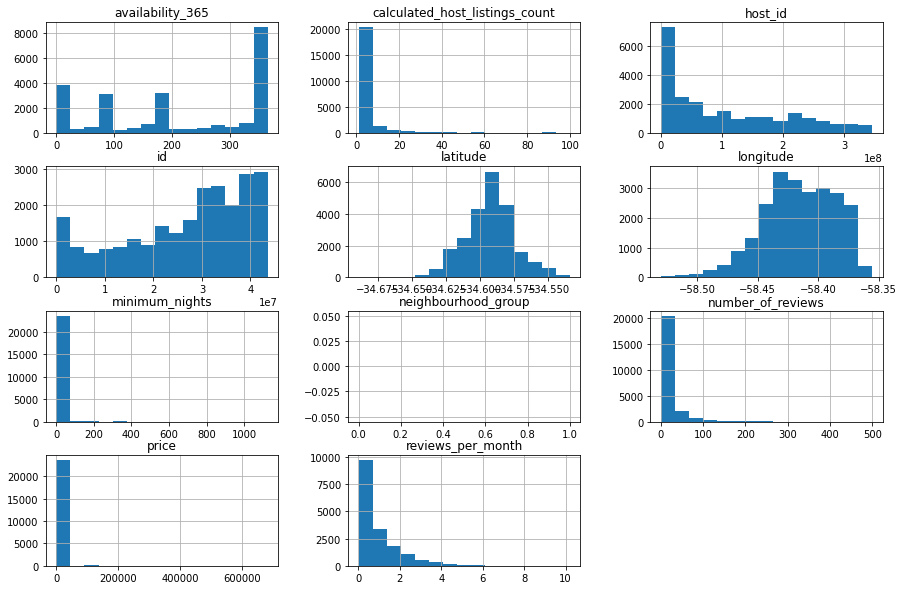

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4, Há outliers presentes?**


Pela distribuição dos histogramas, é possível verificar indícios da presença de *outliers*. 

Se observarmos, por exemplo, as varáveis `price`, `minimum_nights`, `reviews_per_month`, `number_of_reviews` e `calculated_host_listing_count`, veremos que os valores não seguem uma distrubuição e acabam distorcendo a representação gráfica. 

Para podermos confirmar, há duas maneiras rápidas que auxiliam a detecção desses valores. São elas:

*   Resumos estatístico por meio do método `describe()`
*   Plotar `bloxplots` para a variável

In [9]:
# ver o resumo estatístico das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,23828.000000,23828.000000,23828.000000,17212.000000,23828.000000,23828.000000
mean,4154.259065,6.303676,16.156455,0.952863,6.323737,209.460173
std,17037.797459,25.923081,32.136814,1.067921,14.751120,139.348356
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1367.000000,1.000000,0.000000,0.210000,1.000000,89.000000
50%,2182.000000,3.000000,4.000000,0.560000,1.000000,180.000000
75%,3413.000000,5.000000,17.000000,1.320000,4.000000,364.000000
max,682597.000000,1125.000000,500.000000,10.210000,100.000000,365.000000


Olhando o resumo estatístico, podemos confirmar algumas hipóteses como:

*   A variável `price` possui 75% dos valores abaixo de 3413, porém o seu valor máximo chega a 6825597.
*   A quantida máxima de noites (`minimum_nights`) está acima de 365 dias no ano, por sua vez, 75% dos valores estão abaixo de 5
*   A quantidade de de imóveis do mesmo anfitrião (`calculated_host_listings_count`) possui 75% dos seus valores abaixo de 4, entretanto, possui um valor máximo de 100.
*   A variável `number_of_reviews` possui mvalor máximo de 500, mas 3/4 estão dos valores estão abaixo de 17
*   A quantidade de vezes que os imóveis são revisitados por mês possui 75% dos valors abaixo de 1,32, porém o máximo encontra-se em 10,21


#### Boxplot

O *boxplot* é a forma gráfica de visualização dos *outliers*. Nele podemos enxergar a média, os quartis e os dados *outliers*. Observe a imagem a seguir:

<img alt="Arquitetura moderna" width="50%" src='https://www.gradusct.com.br/wp-content/uploads/2018/07/Boxplot-04.png'>
<figcaption>Figura 4: Porto Madera - Buenos Aires.</figcaption>

Uma das técnicas utilizadas para calcular dados *outliers* e a partir do cálculo do Intervalo Interquartílico. A partir dele encotramos os limites mínimos e máximos das nossas variáveis. Todos os valores que aparecem além desses limites são dados *outliers*. 

No entanto, dados *outliers* possuem as suas singularidades pois, podem ter sido gerados por erros de inclusão dos dados, como, podem ser registros correto que estão fora do padrão da variável. Por isso, é de grande importância sabermos como manipular esses dados da forma mais correta e buscando sempre minimizar as distorções trazidas por eles.

Em nosso conjunto de dados, utilizaremos a técnica supracitada e eliminaremos todos os dados que estiverem além do intervalo interquartílico. É claro que para uma análise mais aprofundada deveríamos realizar uma busca detalhada nos dados para tentarmos encontrar os motivos deles estarem no banco de dados.

##### Boxplot para `minimum_nights`

Utilizando a técnica do Intervalo Interquartílico para definir os limites mínimo e máximo da variável `minimum_nights`.
Após encontrarmos os limites iremos plotar o boxplot, bem como, a quantidade de entradas que serão excluída do nosso conjunto de dados.


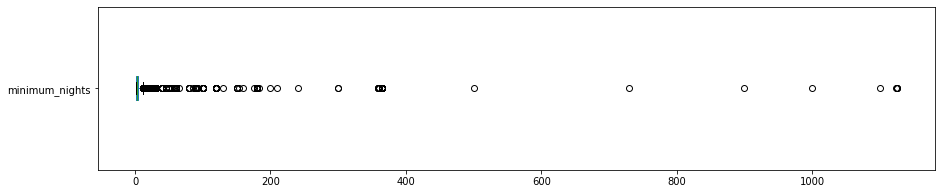

minimum_nights: valores acima de: 11.0
2072 entradas
8.6957%


In [14]:
# minimum_nights
#calculando o intervalo interquartílico
q1 = df.minimum_nights.quantile(q=0.25)
q3 = df.minimum_nights.quantile(q=0.75)
amp = q3 - q1

lim_min = q1 - 1.5 * amp
lim_max = q3 + 1.5 * amp

#não foi utilizado o limite mínimo, pois ele irá ser menor do que zero e em nossos dados não foi encontrado nenhum dado abaixo desse valor.

# Plotando o boxplot
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima do Limite Máximo para minimum_nights

print("minimum_nights: valores acima de:", lim_max)
print("{} entradas".format(len(df[df.minimum_nights > lim_max])))
print("{:.4f}%".format((len(df[df.minimum_nights > lim_max]) / df.shape[0])*100))

##### Boxplot para `price`

Utilizando a técnica do Intervalo Interquartílico para definir os limites mínimo e máximo da variável `price`.
Após encontrarmos os limites iremos plotar o boxplot, bem como, a quantidade de entradas que serão excluída do nosso conjunto de dados.

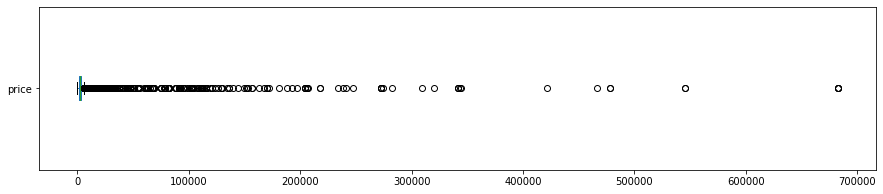

price: valores acima de: 6482.0
2025 entradas
8.4984%


In [15]:
# price
#calculando o intervalo interquartílico
q1 = df.price.quantile(q=0.25)
q3 = df.price.quantile(q=0.75)
amp = q3 - q1

lim_min = q1 - 1.5 * amp
lim_max = q3 + 1.5 * amp

#não foi utilizado o limite mínimo, pois ele irá ser menor do que zero e em nossos dados não foi encontrado nenhum dado abaixo desse valor.

# Plotando o boxplot
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima do Limite máximo para price

print("price: valores acima de:", lim_max)
print("{} entradas".format(len(df[df.price > lim_max])))
print("{:.4f}%".format((len(df[df.price > lim_max]) / df.shape[0])*100))

##### Boxplot para `number_of_reviews`

Utilizando a técnica do Intervalo Interquartílico para definir os limites mínimo e máximo da variável `number_of_review`.
Após encontrarmos os limites iremos plotar o boxplot, bem como, a quantidade de entradas que serão excluída do nosso conjunto de dados.


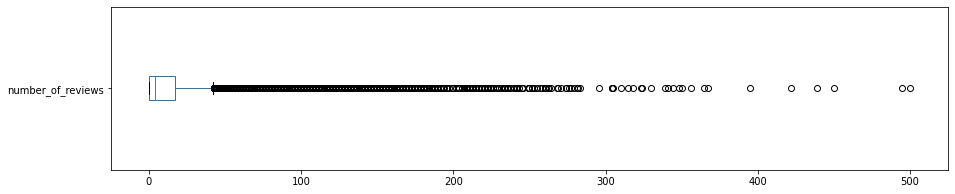

number_of_reviews: valores acima de: 42.5
2616 entradas
10.98%


In [16]:
# number_of_reviews
#calculando o intervalo interquartílico
q1 = df.number_of_reviews.quantile(q=0.25)
q3 = df.number_of_reviews.quantile(q=0.75)
amp = q3 - q1

lim_min = q1 - 1.5 * amp
lim_max = q3 + 1.5 * amp

#não foi utilizado o limite mínimo, pois ele irá ser menor do que zero e em nossos dados não foi encontrado nenhum dado abaixo desse valor.

# Plotando o boxplot
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantida de valores acima do Limite Máximo para number_of_reviews

print("number_of_reviews: valores acima de:", lim_max)
print("{} entradas".format(len(df[df.number_of_reviews > lim_max])))
print("{:.4}%".format((len(df[df.number_of_reviews > lim_max])/ df.shape[0])*100))

##### Boxplot para `reviews_per_month`

Utilizando a técnica do Intervalo Interquartílico para definir os limites mínimo e máximo da variável `reviews_per_month`.
Após encontrarmos os limites iremos plotar o boxplot, bem como, a quantidade de entradas que serão excluída do nosso conjunto de dados.


reviews_per_month: valores acima de: 2.9850000000000003
988 entradas
4.146%


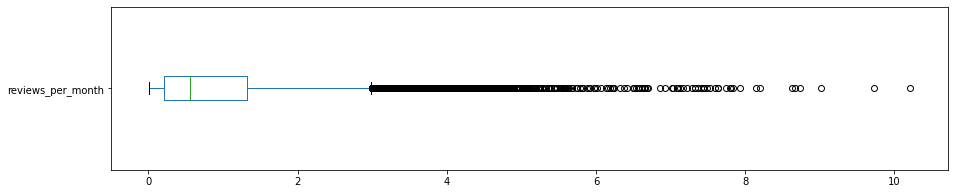

In [17]:
# reviews_per_month
#calculando o intervalo interquartílico
q1 = df.reviews_per_month.quantile(q=0.25)
q3 = df.reviews_per_month.quantile(q=0.75)
amp = q3 - q1

lim_min = q1 - 1.5 * amp
lim_max = q3 + 1.5 * amp

#não foi utilizado o limite mínimo, pois ele irá ser menor do que zero e em nossos dados não foi encontrado nenhum dado abaixo desse valor.

# Plotando o boxplot
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.show

#ver quantidade de valores acima do Limite Máximo para reviews_per_month

print("reviews_per_month: valores acima de:", lim_max)
print("{} entradas".format(len(df[df.reviews_per_month > lim_max])))
print("{:.4}%".format((len(df[df.reviews_per_month > lim_max]) / df.shape[0])*100))

##### Boxplot para `calculated_host_listings_count`

Utilizando a técnica do Intervalo Interquartílico para definir os limites mínimo e máximo da variável `calculated_host_listings_count`.
Após encontrarmos os limites iremos plotar o boxplot, bem como, a quantidade de entradas que serão excluída do nosso conjunto de dados.

calculated_host_listings_count: valores acima de: 8.5
3420 entradas
14.35%


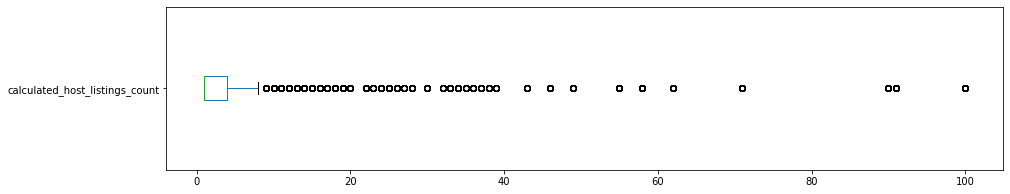

In [18]:
# calculated_host_listings_count
#calculando o intervalo interquartílico
q1 = df.calculated_host_listings_count.quantile(q=0.25)
q3 = df.calculated_host_listings_count.quantile(q=0.75)
amp = q3 - q1

lim_min = q1 - 1.5 * amp
lim_max = q3 + 1.5 * amp

#não foi utilizado o limite mínimo, pois ele irá ser menor do que zero e em nossos dados não foi encontrado nenhum dado abaixo desse valor.

# Plotando o boxplot
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3))
plt.show

#ver quantidade de valores acima do Limimte Máximo para calculated_host_listings_count

print("calculated_host_listings_count: valores acima de:", lim_max)
print("{} entradas".format(len(df[df.calculated_host_listings_count > lim_max])))
print("{:.4}%".format((len(df[df.calculated_host_listings_count > lim_max]) / df.shape[0])* 100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* em diversas variáveis do nosso *DataFrame*, vamos agora limpar e plotar novamente o histograma. Lembrando que vamos utilizar apenas os limites máximos de cada uma das variáveis.

Vale apenas ressaltar que nesse momento não iremos realizar uma analise profunda dos dados para descobrirmos os motivos da existência desses dados *outliers*. Porém, ao observarmos o histograma decorrente da retirada desses dados, iremos observar uma maior harmonização dos mesmos.

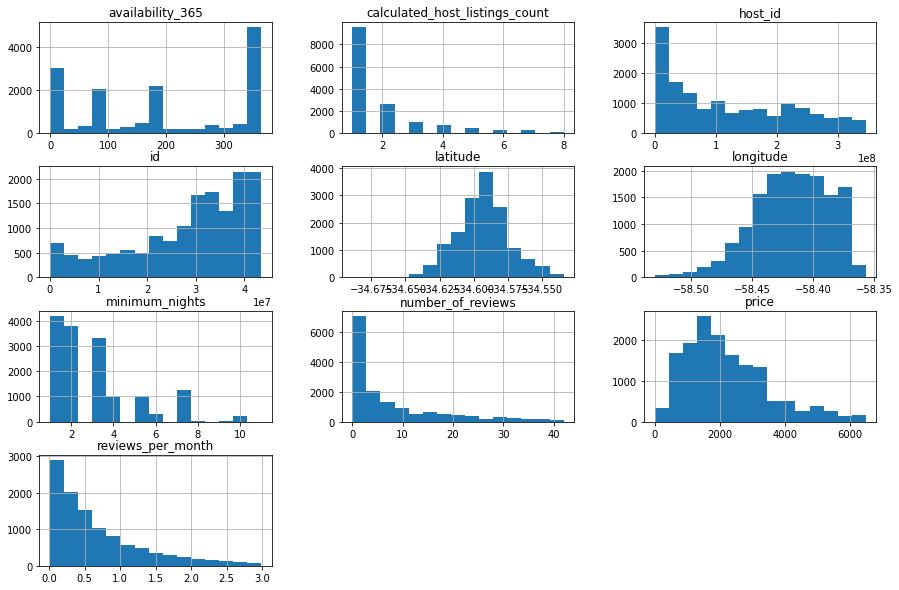

In [19]:
# remover os outliers em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > 11].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 6482].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 42.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 2.99].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 8.5].index, axis=0, inplace=True)

#remover neighbourhood_group, pois está vázio

df_clean.drop('neighbourhood_group', axis=1, inplace=True)


#plotar o histograma com as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

A partir da observação dos histogramas sem os dados *outliers* pode-se concluir que:

*   a maioria dos anfitriões `calculated_host_listings_count`possuem de 1 a 2 imóveis
*   os hóspedes, em sua maioria, ficam de duas a quatro noites `minimum_nights`
*   os imóveis são revisitados poucas vezes `number_of_reviews`
*   os valores das acomodações estão, em sua maioria, entre 500 a 3000 `price`
*   o número de revisitas por mês `reviews_per_month` é baixo para a maioria dos imóveis disponíveis

### **Q4. Qual a correlação existente entre as variáveis?**

Correlação significa que existem uma relação entre duas coisas, nesse caso, entre duas variáveis do nosso *dataset*. 

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entreas as variáveis de interesse, iremos realizar dois procedimentos. São eles;

*   Criar uma matriz de correlação
*   Gerar um *heatmap* a partir dessa matriz de correlação, usando a biblioteca `seaborn`

In [20]:
# criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.052777,0.046863,0.052303,0.058456,0.133944
minimum_nights,0.052777,1.000000,-0.022401,-0.137863,0.031722,0.014251
number_of_reviews,0.046863,-0.022401,1.000000,0.618116,0.012966,0.041875
reviews_per_month,0.052303,-0.137863,0.618116,1.000000,-0.072533,-0.025152
calculated_host_listings_count,0.058456,0.031722,0.012966,-0.072533,1.000000,0.172213
availability_365,0.133944,0.014251,0.041875,-0.025152,0.172213,1.000000


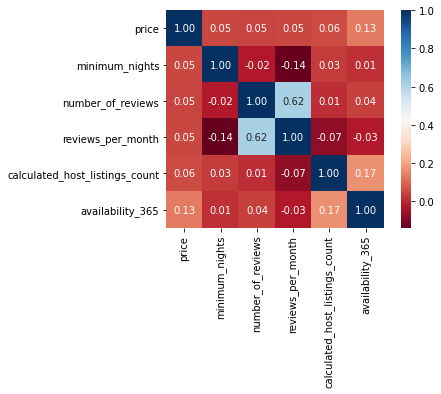

In [23]:
#Heatmap

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A partir da visualizão e analise da matriz de correlação e do *Heat map* (mapa de calor), pode-se concluir que, as variáveis possuem graus distintos de correlação entre elas.
Note-se que a maior correlação acontece entre número de revisitas e a quantidade de revisitas por mês de um imóvel. Por outro lado, há uma baixa correlação entre o número de diárias e o número de revisitas por mês do imóvel. 

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb de Buenos Aires?**

A coluna variável `room_type`indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções como, por exemplo, casas ou apartamentos inteiros, quartos de residências, quartos de hóteis, ou até mesmo quartos compartilhados.

Vamos contar a quantidade de ocorrência de cada tipo de aluguel, usando o método `value_counts()`.


In [28]:
# mostrar a quantidade de cada tipo de imóvel disponível

df.room_type.value_counts()

Entire home/apt    18475
Private room        4567
Shared room          537
Hotel room           249
Name: room_type, dtype: int64

In [29]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.775348
Private room       0.191665
Shared room        0.022537
Hotel room         0.010450
Name: room_type, dtype: float64

A observação das informações sobre o tipo de imóvel alugado em Buenos Aires nos diz que:
*   77,5% são casas ou apartamentos particulares inteiros
*   19,1% são quartos particulares
*   menos de 0,03 são quartos de hóteis ou compartilhados

### **Q6. Qual a localidade mais cara de Buenos Aires?**

Uma maneira de se verificar uma variável em função da outra é usando o método `groupby()`. No caso, queremor com os bairros (*neighbourhoods*) a partir do preço de locação.

In [31]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    4024.723810
Villa Soldati    3859.666667
Versalles        2668.500000
Palermo          2590.041866
Retiro           2494.817190
Recoleta         2438.151296
Nuñez            2256.725610
San Telmo        2201.509009
Belgrano         2188.126691
San Nicolas      2163.077100
Name: price, dtype: float64

Acima, podemos perceber que os bairros Villa Soldati, Puerto Madero, Palermo, Retiro e Versalles possuem os valores mais elevados para locação na cidade de Buenos Aires.

Contudo, é interessante observarmos se essas localidades possuem amostras representativas, ou  não representativas para o conjunto dos dados disponíveis. 

Vamos verificar então a quantidade de amostras disponíveis para os dois bairros mais caros da cidade.

In [32]:
#ver quantidade de imóveis disponíveis na Villa Soldati e Puerto Madero

print(df_clean[df_clean.neighbourhood == "Villa Soldati"].shape)
print(df_clean[df_clean.neighbourhood == "Puerto Madero"].shape)

# ver as três entradas de Villa Soldati
df_clean[df_clean.neighbourhood == "Villa Soldati"]

(3, 15)
(105, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14022,32548725,Departamento amplio y cómodo,226116702,Aneth,Villa Soldati,-34.66094,-58.43645,Entire home/apt,2731,1,0,NaN,NaN,2,179
15702,34492123,Muy buen hambiente..tranquilidad y espacio,260348454,Nilsa,Villa Soldati,-34.65855,-58.44305,Private room,4032,1,0,NaN,NaN,1,364
16014,34811527,Departamento capital federal 4 ambientes grandes,262448759,Fer,Villa Soldati,-34.66639,-58.44716,Private room,4816,1,0,NaN,NaN,1,365


In [33]:
# ver as entradas para o bairro de Puerto Madero

df_clean[df_clean.neighbourhood == "Puerto Madero"]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
525,699486,Studio @ Puerto Madero Buenos Aires,719967,Nicolas,Puerto Madero,-34.62082,-58.35935,Entire home/apt,3759,2,21,2019-01-27,0.27,1,224
1301,2059189,"Apartment puerto madero, buenos aires city",908033,Heidi,Puerto Madero,-34.61784,-58.36073,Entire home/apt,4779,2,13,2020-03-18,0.18,1,180
1789,3433851,Beautiful apartment - Puerto Madero,3190038,Fernando,Puerto Madero,-34.61536,-58.36074,Entire home/apt,5120,4,29,2020-03-21,0.42,1,89
2108,4650512,Apart 5★ Amoblado Puerto Madero-Rio V,23825436,Horacio,Puerto Madero,-34.61612,-58.36245,Entire home/apt,5461,3,1,2015-09-10,0.02,2,364
2109,4652203,Apart 5★ Amoblado Puerto Madero-Brisas,23825436,Horacio,Puerto Madero,-34.61745,-58.36160,Entire home/apt,5461,3,0,NaN,NaN,2,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23117,42643389,Tango 1,155956013,Ely,Puerto Madero,-34.61916,-58.36485,Entire home/apt,3004,1,2,2020-03-15,0.79,1,326
23546,43011898,"Ideal 2 bedroom apartment + parking, Puerto Ma...",230054892,Alicia Dolores,Puerto Madero,-34.61106,-58.36359,Entire home/apt,5120,3,0,NaN,NaN,2,363
23579,43112374,edificio sls lux puerto madero buenos Aires Arg,119355873,Gaston,Puerto Madero,-34.61777,-58.36161,Entire home/apt,0,1,0,NaN,NaN,1,365
23585,43132477,Departamento en Puerto Madero,343381757,Danisa,Puerto Madero,-34.61604,-58.36321,Entire home/apt,5461,3,0,NaN,NaN,1,363


Fica claro que os bairros de *Puerto Madero* e *Villa Soldati*, os dois com os imóveis mais caros para alugar, na cidade, apresentam poucos imóveis disponíveis.

### **Q7. Qual a área de maior concentração de imóveis em Buenos Aires?**

A partir do momento em que temos dados de latitude e longitude pode-se querer observar as áreas com maiores e menores concentrações de imóveis disponíveis na cidade de Buenos Airtes.

Para isso, considera-se `x = longitude`e `y = latitude`.

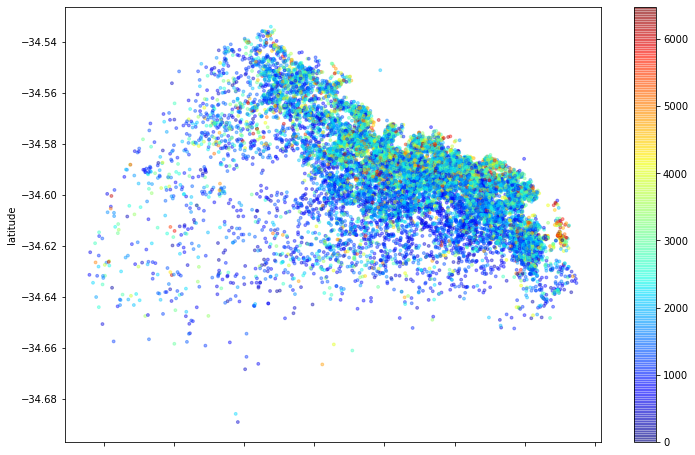

In [19]:
# plotar os imóveis a partir das suas coordenadas geográficas (latitude e longitude)

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

O mapa nos possibilita perceber que a maioria dos imóveis disponíveis estão mais ao Norte e Nordeste da cidade. E esse número vai diminuindo conforme nos deslocamos para o Sul. Essa presença maior de imóveis para alugar em algumas determinadas regiões da cidade nos permite concluir que, são lugares com maior intensidade do estilo de vida urbano, isto é, a presença do comércio, dos prestadores de servições, dos bares, restaurantes, teatros, dentre outros elementos corroborantes a nossa analise.

## **Conclusão**

Os dados resumidos do *Airbnb* para a cidade de Buenos Aires nos permitiu conhecer melhor algumas características sobre os imóveis disponíveis no site. Obtivemos informações sobre preços, localização, tipos de imóveis, quantidade de noites alugadas, quantidade de revisitas por parte dos hóspedes, dentre outras.

Contudo, vale destacar a natureza resumida do *dataset* utilizado. Existem outros conjuntos de dados disponibilizado pelo site com um número maior de entradas e variáveis, que poderia impactar em resultados distintos daquele alcançado por esse projeto.